In [ ]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot

import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

In [24]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


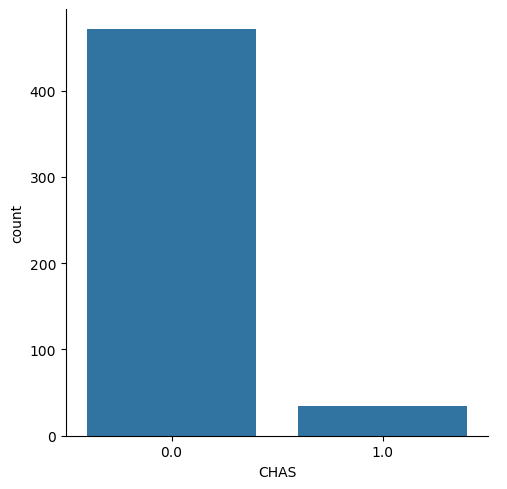

In [23]:
#Task 2: Question 2
sns.catplot(x = 'CHAS', kind = 'count', data = boston_df)

Text(0.5, 1.0, 'Median value of owner-occupied homes by Age Group')

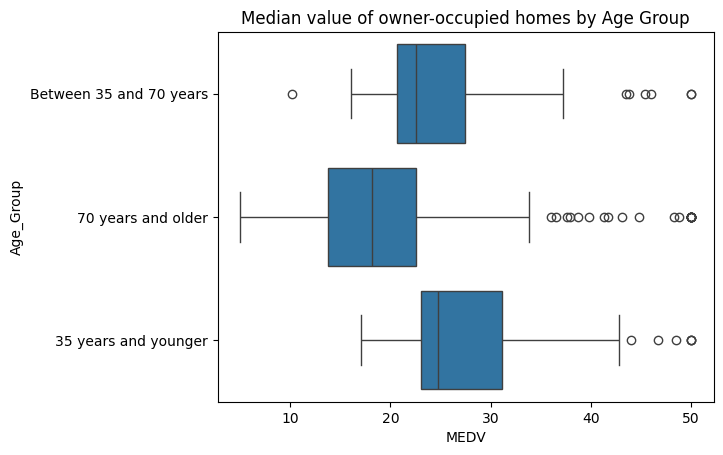

In [12]:
#Task 2: Question 3
boston_df.loc[(boston_df['AGE'] <= 35), 'Age_Group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Age_Group'] = 'Between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = '70 years and older'
ax3 = sns.boxplot(x = 'MEDV', y = 'Age_Group', data = boston_df)
ax3.set_title('Median value of owner-occupied homes by Age Group')

Text(0.5, 1.0, 'Nitric oxide concentration per portion of non-retail business acres per town')

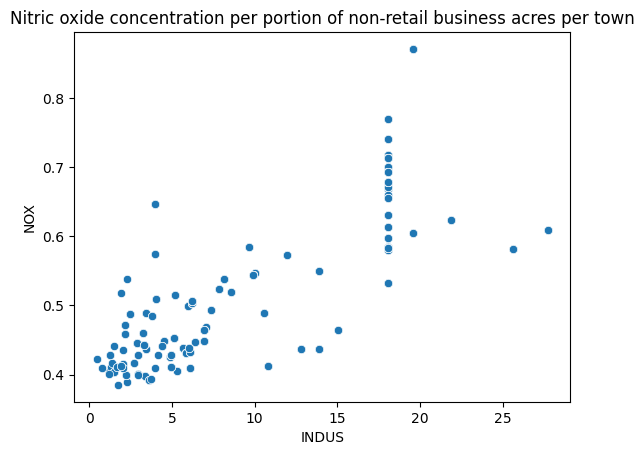

In [13]:
#Task 2: Question 4
ax4 = sns.scatterplot(y = 'NOX', x = 'INDUS', data = boston_df)
ax4.set_title('Nitric oxide concentration per portion of non-retail business acres per town')

Text(0, 0.5, 'Number of neighborhoods')

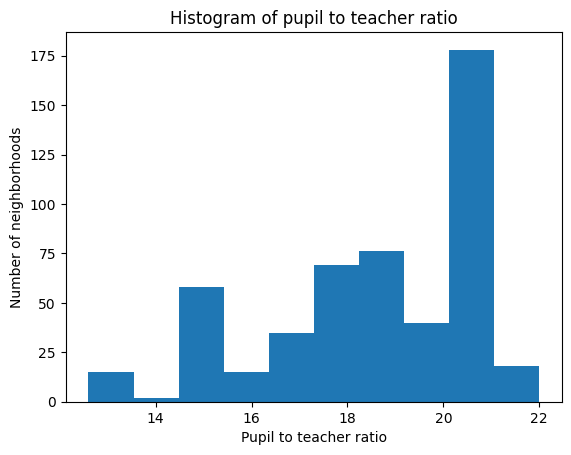

In [14]:
#Task 2: Question 5
pyplot.hist(boston_df["PTRATIO"])
pyplot.title("Histogram of pupil to teacher ratio")
pyplot.xlabel("Pupil to teacher ratio")
pyplot.ylabel("Number of neighborhoods")

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

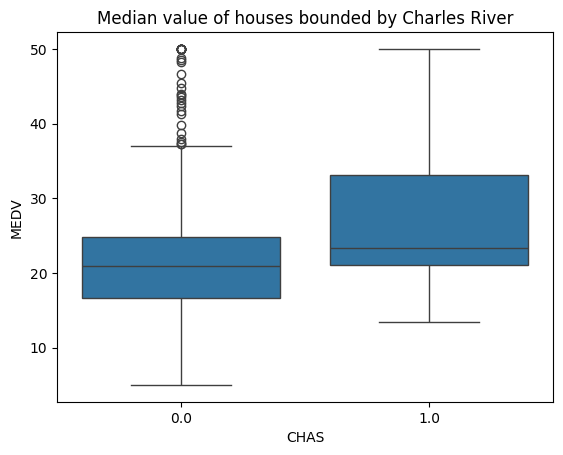

In [25]:
# Task 3: Question 1
# Null Hypothesis: Both average MEDV are the same
# Alternative Hypothesis: Both average MEDV are NOT the same
scipy.stats
sns.boxplot(x = 'CHAS', y = 'MEDV', data = boston_df).set_title('Median value of houses bounded by Charles River')
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'], boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = True)

In [29]:
# pvalue=7.390623170519905e-05 < (α = 0.05) therefore there is significant evidence to suggest that both average MEDV are not the same, hence reject Ho

Text(0.5, 1.0, 'Median value of owner-occupied homes per age group')

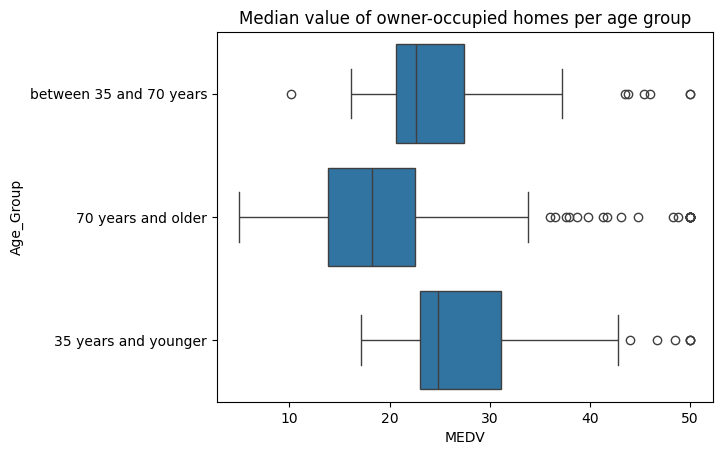

In [27]:
# Task 3:  Question 2
# Null Hypothesis: the three population means are equal
# Alternative Hypothesis: At least one of the means differ
boston_df.loc[(boston_df['AGE'] <= 35), 'Age_Group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Age_Group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = '70 years and older'
ax3 = sns.boxplot(x = 'MEDV', y = 'Age_Group', data = boston_df)
ax3.set_title('Median value of owner-occupied homes per age group')

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

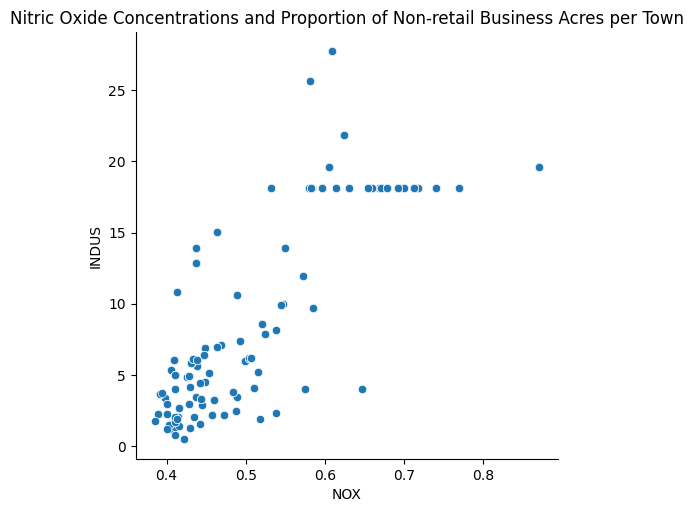

In [26]:
# Task 3:  Question 3
# Null Hypothesis: NOX is not associated with INDUS
# Alternative Hypothesis: NOX is associated with INDUS
sns.relplot(x = 'NOX', y = 'INDUS', data = boston_df).set(title = 'Nitric Oxide Concentrations and Proportion of Non-retail Business Acres per Town')
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

In [30]:
# pvalue=7.913361061210442e-98 < (α = 0.05) therefore there is significant evidence to suggest that NOX is associated with INDUS, hence reject Ho

PearsonRResult(statistic=0.2499287340859039, pvalue=1.2066117273371074e-08)

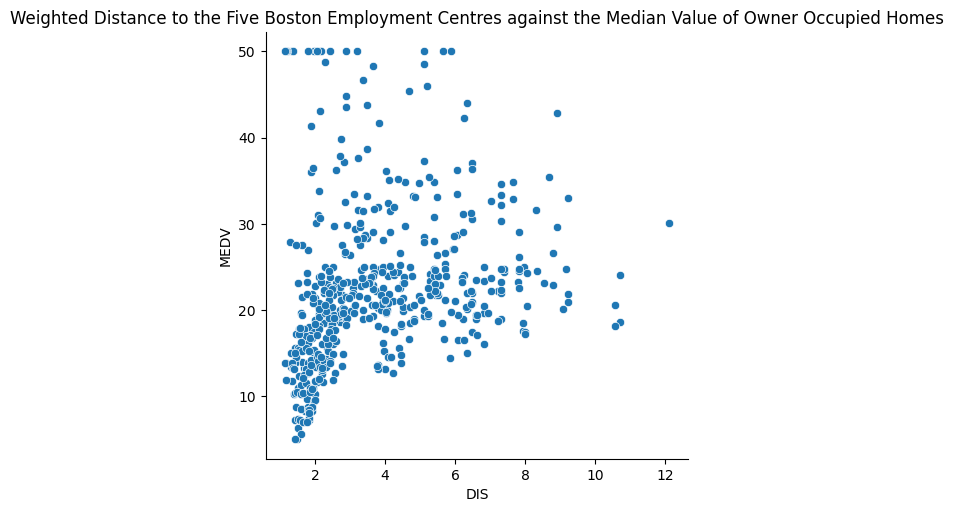

In [28]:
# Task 3:  Question 4
# Null Hypothesis: weighted distances to five Boston employment centres are not related to median value
# Alternative Hypothesis: weighted distances to five Boston employment centres are related to median value
sns.relplot(x = 'DIS', y = 'MEDV', data = boston_df).set(title = 'Weighted Distance to the Five Boston Employment Centres against the Median Value of Owner Occupied Homes')
scipy.stats.pearsonr(boston_df['DIS'], boston_df['MEDV'])

In [31]:
# pvalue=1.2066117273371074e-08 < (α = 0.05) therefore there is significant evidence to suggest that weighted distances to five Boston employment centres are related to median value, hence reject Ho